<a href="https://colab.research.google.com/github/Actulus/IntelligensModszerekTantargy/blob/main/Klaszterezes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

from google.colab import widgets
from typing import Tuple

from sklearn.metrics.pairwise import euclidean_distances

**Adatok betöltése**

In [86]:
data_in_frame = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
                   header=None, names=['sepal length', 'sepal width', 'petal length', 'petal width', 'class'])

data = np.zeros( (len(data_in_frame), 4 ))
data[:,0] = data_in_frame['sepal length']
data[:,1] = data_in_frame['sepal width']
data[:,2] = data_in_frame['petal length']
data[:,3] = data_in_frame['petal width']

**1. feladat: Iris adatok klaszterezése k-means-zel**



In [87]:
# k-means vázlata
# (ez kezdetben nem végrehajtható, mert a hivatkozott függvények még nincsenek implementálva)

num_iterations = 10
centroids = initial_centroids(data)
for i in range(num_iterations):
  clusters_of_instances = calculate_clusters_of_instances(data, centroids)
  centroids = calculate_new_centroids(data, clusters_of_instances)

(a) Írjon egy függvényt *initial_centroids* néven, amely visszaadja a kezdeti klaszterközéppontokat! Annak érdekében, hogy tanulmányozhassuk a kezdeti klaszterközéppontok hatását a klaszterezés eredményére, most ne véletlenszerűen válassza meg a kezdeti klaszterközéppontokat, hanem válassza a 60-dik, 70-dik és 80-dik példányokat kezdeti klaszterközéppontnak! A függvény az adattábla előbbi példányait adja vissza, mint kezdeti klaszterközéppontot!

(b) Írjon egy függvényt *calculate_clusters_of_instances* néven, amely meghatározza, hogy adott centroidok mellett mely klaszterekbe tartoznak az egyes példányok, a klaszterek sorszámozása kezdődjön 0-val. A függvény adjon vissza egy np.array-t, amely példányonként azt tartalmazza, hogy a hányadik klaszterba tartozik az adott példány!

(c) Írjon egy függvényt *calculate_new_centroids* néven, amely kiszámolja az új centroidokat!

(d) Annak érdekében, hogy meg tudjuk jeleníteni az algoritmus lépéseit, módosítsa a *k-means vázlata* elnevezésű kódot olyan módon, hogy a  *clusters_of_instances_per_iteration* elnevezésű listába (np.arrayek listájába) mentse le minden iteráció végén az aktuális klaszterezést!

(e) Írjon egy függvényt *get_color* néven, amely a vörös, kék és sárga színeket rendeli a 0, 1, 2 számokhoz!

(f) Írja meg azt a kódrészletet, amely létrehoz egy listát *colors* néven, amely a legelső ('0-dik') iteráció végén keletkezett klaszterezés eredményének megfelelő színeket tartalmazza az adattábla egyes példányaira!

(g) Írja meg azt a kódrészletet, amely létrehozza egy listák listáját *colors_per_iteration* néven, amely az előbbi pontban létrehozott listához hasonló listákat tartalmaz minden egyes iteráció végén kapott klaszterezésnek megfelelően!

(h) A megadott kódrészlet segítségével jelenítse meg a klaszterezés menetét (a klazterezés eredményét az egyes iterációk végén), és értelmezze az ereményeket!

(i) Módosítsa a *k-means vázlata* elnevezésű kódot olyan módon, minden egyes iteráció végén mentse le a klaszterközéppontokat. Írassa ki a klaszterközéppontokat és értelmezze az ereményeket!

(j) Módosítsa a *k-means vázlata* elnevezésű kódot olyan módon, minden egyes iteráció végén számolja ki az azonos klaszterekbe került példányok közötti átlagos távolságot (intra-cluster distance)! Jelenítse meg az eredményeket a matplotlib.pyplot.plot() függvény segítségével!

(k) Módosítsa a *k-means vázlata* elnevezésű kódot olyan módon, minden egyes iteráció végén számolja ki a különböző klaszterekbe került példányok közötti átlagos távolságot (inter-cluster distance)! Jelenítse meg az eredményeket a matplotlib.pyplot.plot() függvény segítségével!

(l) Módosítsa a *k-means vázlata* elnevezésű kódot olyan módon, minden egyes iteráció végén számolja ki az egyes példányok hozzájuk legközelebbi klaszerközéponttól való átlagos távolságát! Jelenítse meg az eredményeket a matplotlib.pyplot.plot() függvény segítségével!

(m) Indítsa a klaszterezést a 25-dik, 75-dik, 125-dik példányokat használva kezdeti klaszterközéppontként! Hasonlítsa össze az eredményeket az előbbiekben kapott eredményekkel!

(n) Indítsa a klaszterezést az első, második és harmadik példányokat használva kezdeti klaszterközéppontként! Hasonlítsa össze az eredményeket az előbbiekben kapott eredményekkel!

In [88]:
def initial_centroids(data, indicies=[60, 70, 80]):
  return data[indicies]

In [89]:
# a klaszterek sorszámozása kezdődjön 0-val
# a függvény adjon vissza egy np.array-t, amely példányonként azt tartalmazza, hogy a hányadik klaszterba tartozik az adott példány!

def calculate_clusters_of_instances(data, centroids):
  distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
  cluster_assignments = np.argmin(distances, axis=1)

  return cluster_assignments

In [90]:
def calculate_new_centroids(data, calculate_clusters_of_instances, num_clusters=3):
  centroids = np.zeros((num_clusters, data.shape[1]))
  for i in range(num_clusters):
    cluster_data = data[calculate_clusters_of_instances == i]
    centroids[i] = np.mean(cluster_data, axis=0)

  return centroids

In [91]:
# módosítsa a k-means vázlata elnevezésű kódot olyan módon, hogy a clusters_of_instances_per_iteration elnevezésű listába (np.arrayek listájába)
# mentse le minden iteráció végén az aktuális klaszterezést

num_iterations = 10
centroids = initial_centroids(data)
clusters_of_instances_per_iteration = []

for i in range(num_iterations):
  clusters_of_instances = calculate_clusters_of_instances(data, centroids)
  centroids = calculate_new_centroids(data, clusters_of_instances)
  clusters_of_instances_per_iteration.append(clusters_of_instances)

In [92]:
# vörös, kék és sárga színeket rendeli a 0, 1, 2 számokhoz

def get_color(c):
  if c == 0:
    return 'red'
  elif c == 1:
    return 'green'
  else:
    return 'yellow'

In [93]:
#  Írja meg azt a kódrészletet, amely létrehoz egy listát colors néven, amely a legelső ('0-dik') iteráció végén keletkezett klaszterezés
# eredményének megfelelő színeket tartalmazza az adattábla egyes példányaira!

colors = [get_color(clusters_of_instances_per_iteration[0][j]) for j in range(len(data))]

In [94]:
# Írja meg azt a kódrészletet, amely létrehozza egy listák listáját colors_per_iteration néven, amely az előbbi pontban létrehozott
# listához hasonló listákat tartalmaz minden egyes iteráció végén kapott klaszterezésnek megfelelően!

colors_per_iteration = []
for i in range(num_iterations):
  colors_per_iteration.append([get_color(clusters_of_instances_per_iteration[i][j]) for j in range(len(data))])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

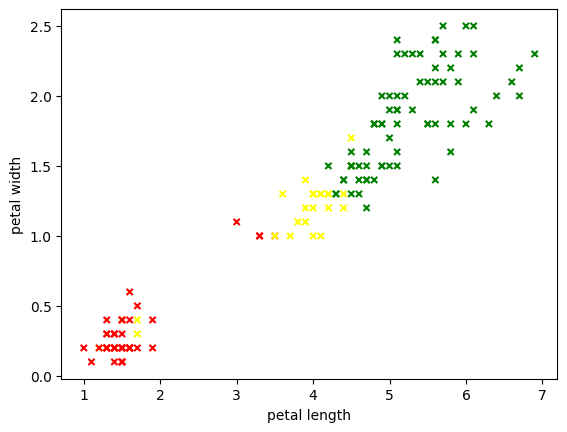

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

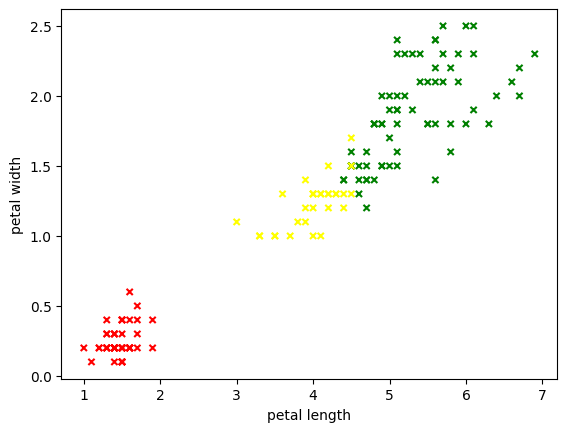

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

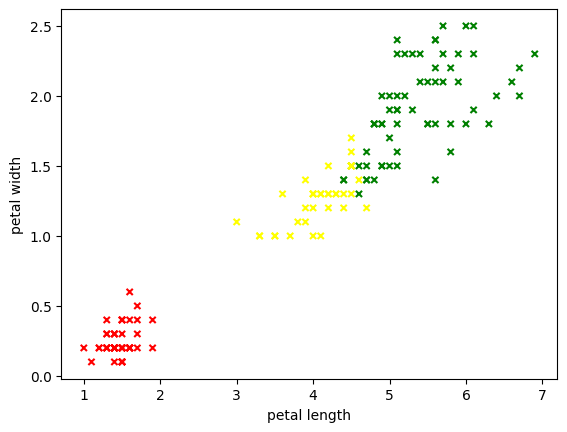

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

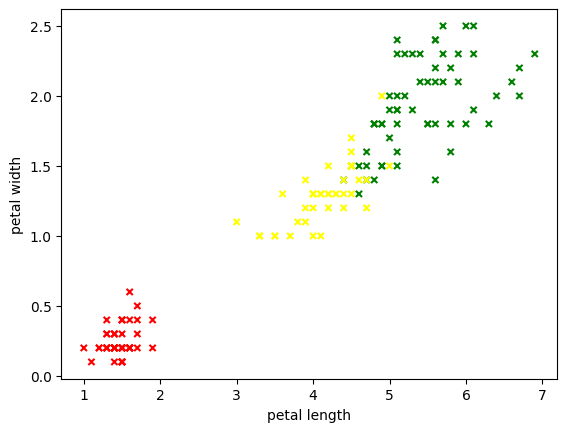

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

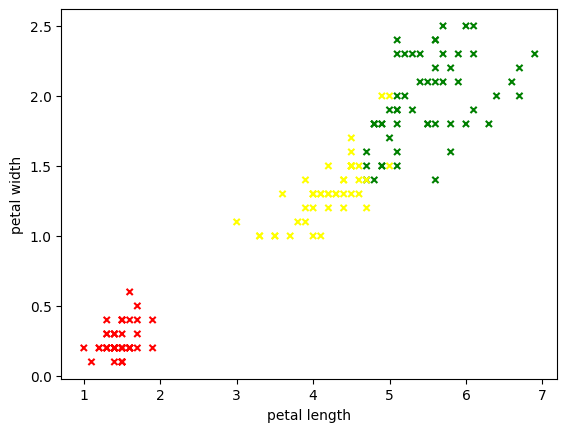

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

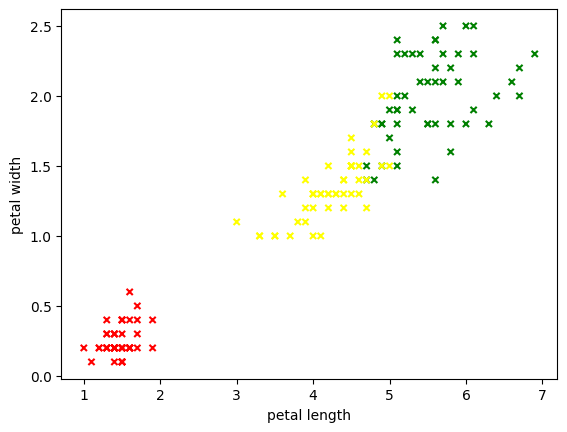

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

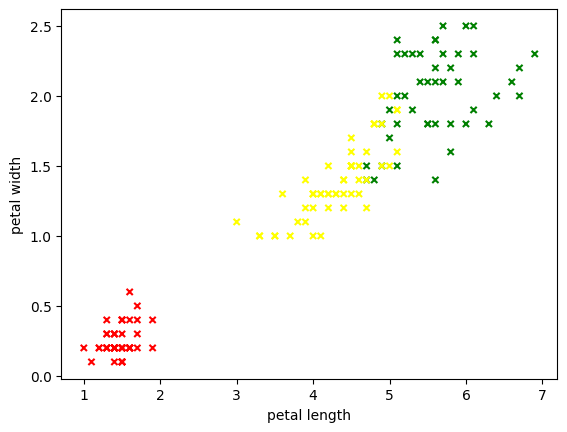

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

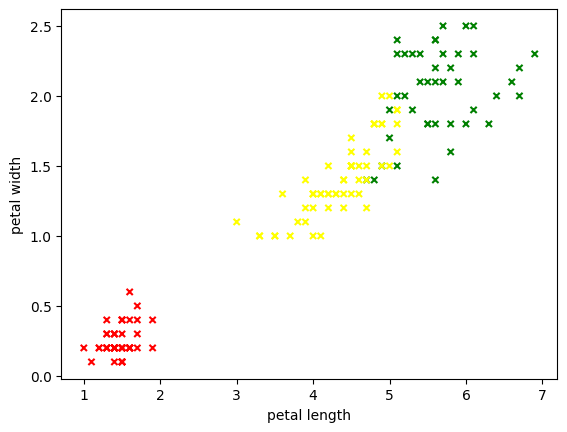

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

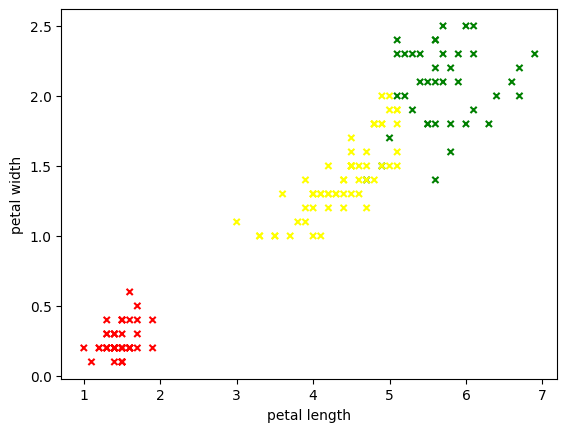

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

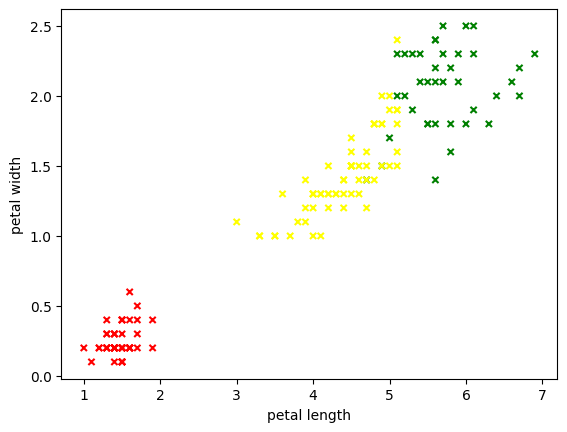

<IPython.core.display.Javascript object>

In [95]:
# A megadott kódrészlet segítségével jelenítse meg a klaszterezés menetét (a klazterezés eredményét az egyes iterációk végén), és értelmezze az ereményeket!

tb = widgets.TabBar(list(range(10)), location='top')

for i in range(num_iterations):
  with tb.output_to(i):
    p = data_in_frame.plot.scatter('petal length', 'petal width', c = colors_per_iteration[i], marker='x')

[[4.94285714 3.26122449 1.60816327 0.30204082]
 [6.50540541 2.98243243 5.25       1.84054054]
 [5.66296296 2.87407407 3.57407407 1.06666667]]
[[5.006      3.418      1.464      0.244     ]
 [6.55652174 2.97536232 5.31449275 1.87391304]
 [5.60645161 2.64193548 3.99677419 1.23548387]]
[[5.006      3.418      1.464      0.244     ]
 [6.59375    2.984375   5.3734375  1.9078125 ]
 [5.67222222 2.67222222 4.075      1.26388889]]
[[5.006      3.418      1.464      0.244     ]
 [6.62833333 3.00166667 5.415      1.93      ]
 [5.7125     2.6775     4.1425     1.295     ]]
[[5.006      3.418      1.464      0.244     ]
 [6.65090909 3.01090909 5.48727273 1.96545455]
 [5.78666667 2.70222222 4.19555556 1.32222222]]
[[5.006      3.418      1.464      0.244     ]
 [6.69215686 3.01176471 5.54117647 1.98823529]
 [5.81428571 2.72653061 4.24489796 1.35102041]]
[[5.006      3.418      1.464      0.244     ]
 [6.76956522 3.03695652 5.6        2.00869565]
 [5.82962963 2.73148148 4.31481481 1.39259259]]
[[5.00

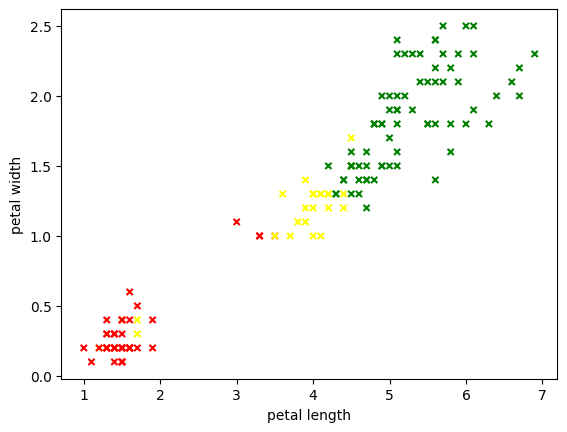

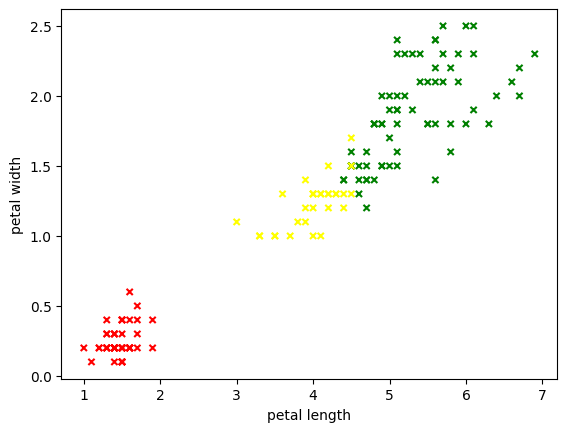

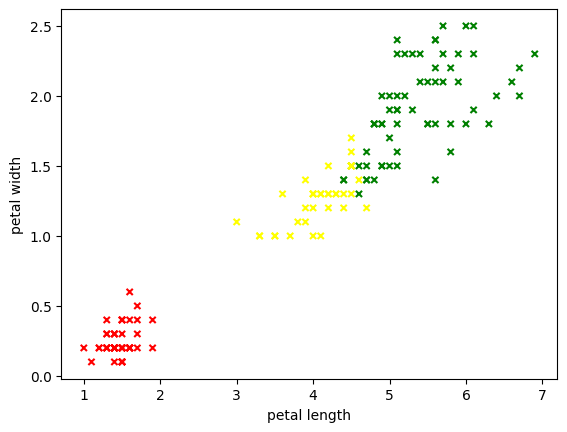

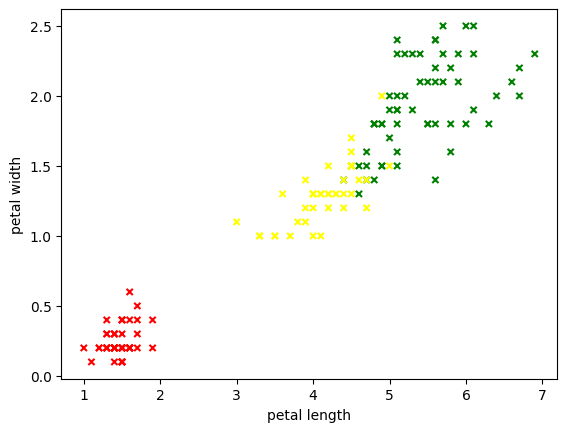

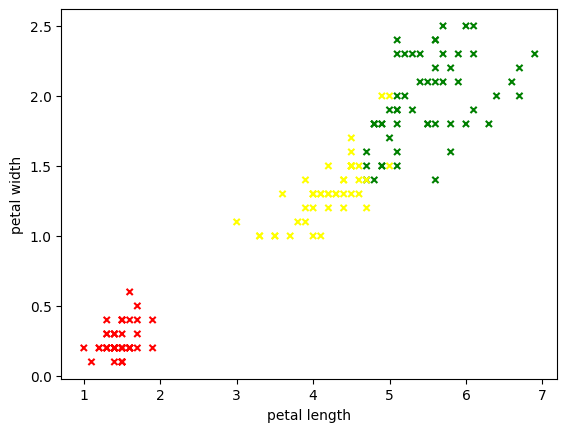

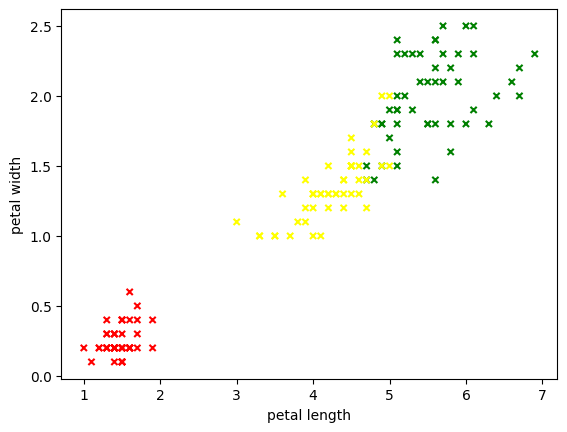

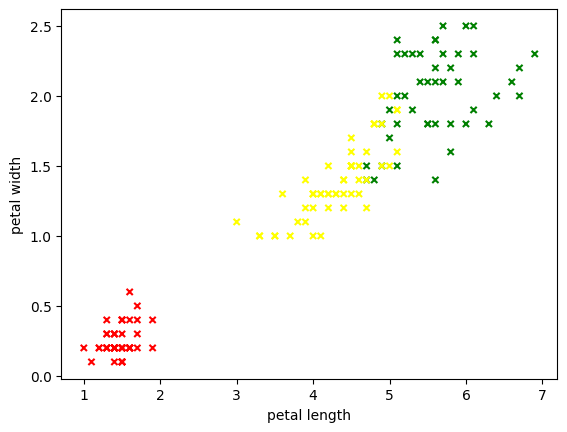

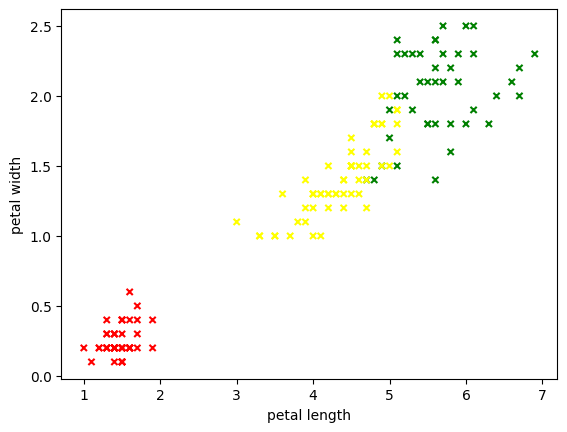

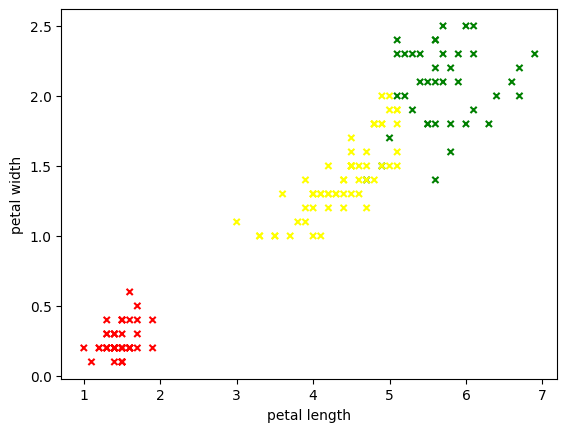

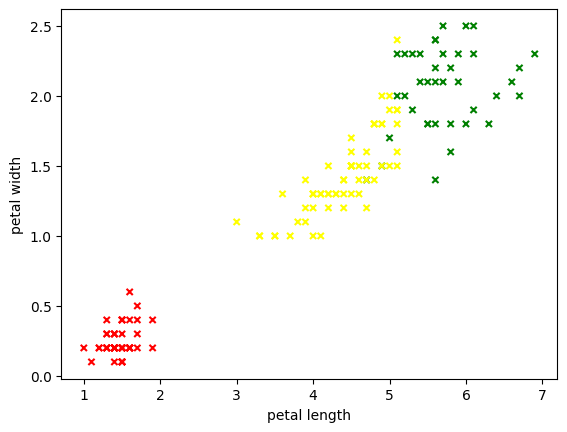

In [96]:
 # Módosítsa a k-means vázlata elnevezésű kódot olyan módon, minden egyes iteráció végén mentse le a klaszterközéppontokat.
 # Írassa ki a klaszterközéppontokat és értelmezze az ereményeket!

num_iterations = 10
centroids = initial_centroids(data)
for i in range(num_iterations):
  clusters_of_instances = calculate_clusters_of_instances(data, centroids)
  centroids = calculate_new_centroids(data, clusters_of_instances)

  print(centroids)
  p = data_in_frame.plot.scatter('petal length', 'petal width', c = colors_per_iteration[i], marker='x')


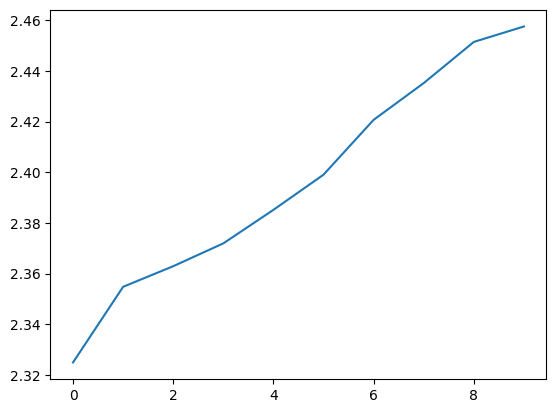

In [106]:
# Módosítsa a k-means vázlata elnevezésű kódot olyan módon, minden egyes iteráció végén számolja ki az azonos klaszterekbe került példányok közötti
# átlagos távolságot (intra-cluster distance)! Jelenítse meg az eredményeket a matplotlib.pyplot.plot() függvény segítségével!

intra_cluster_distances = []
num_iterations = 10
centroids = initial_centroids(data)
for i in range(num_iterations):
  clusters_of_instances = calculate_clusters_of_instances(data, centroids)
  centroids = calculate_new_centroids(data, clusters_of_instances)

  intra_cluster_distances.append(np.mean(euclidean_distances(data, centroids)))

plt.plot(intra_cluster_distances)
plt.show()

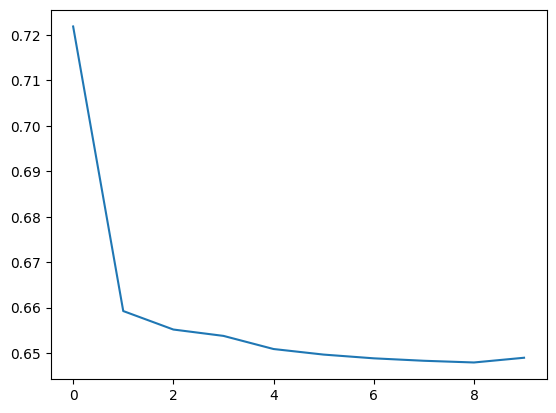

In [108]:
# Módosítsa a k-means vázlata elnevezésű kódot olyan módon, minden egyes iteráció végén számolja ki az egyes példányok hozzájuk
# legközelebbi klaszerközéponttól való átlagos távolságát! Jelenítse meg az eredményeket a matplotlib.pyplot.plot() függvény segítségével!

closest_centroid_avg_distances = []
num_iterations = 10
centroids = initial_centroids(data)
for i in range(num_iterations):
  clusters_of_instances = calculate_clusters_of_instances(data, centroids)
  centroids = calculate_new_centroids(data, clusters_of_instances)

  closest_centroid_avg_distances.append(np.mean(np.min(euclidean_distances(data, centroids), axis=1)))

plt.plot(closest_centroid_avg_distances)
plt.show()

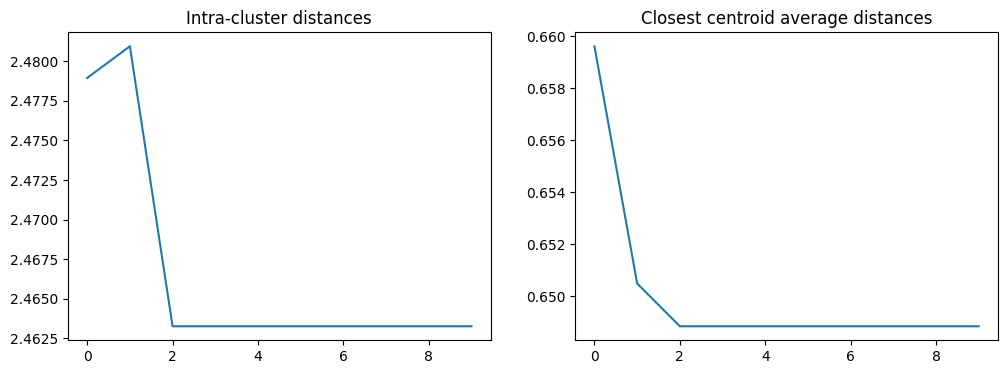

In [111]:
# Indítsa a klaszterezést a 25-dik, 75-dik, 125-dik példányokat használva kezdeti klaszterközéppontként!
# Hasonlítsa össze az eredményeket az előbbiekben kapott eredményekkel!

num_iterations = 10
centroids = initial_centroids(data, [25, 75, 125])
closest_centroid_avg_distances = []
intra_cluster_distances = []
for i in range(num_iterations):
  clusters_of_instances = calculate_clusters_of_instances(data, centroids)
  centroids = calculate_new_centroids(data, clusters_of_instances)

  intra_cluster_distances.append(np.mean(euclidean_distances(data, centroids)))
  closest_centroid_avg_distances.append(np.mean(np.min(euclidean_distances(data, centroids), axis=1)))


plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(intra_cluster_distances)
plt.title('Intra-cluster distances')

plt.subplot(1, 2, 2)
plt.plot(closest_centroid_avg_distances)
plt.title('Closest centroid average distances')

plt.show()

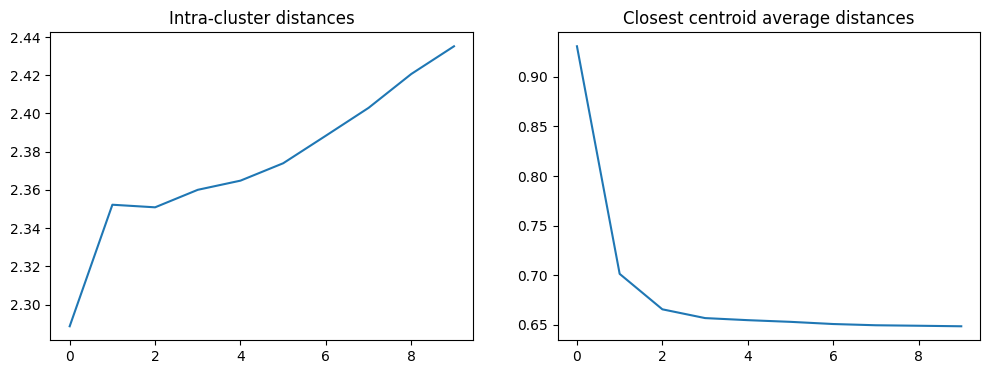

In [112]:
# Indítsa a klaszterezést az első, második és harmadik példányokat használva kezdeti klaszterközéppontként!
# Hasonlítsa össze az eredményeket az előbbiekben kapott eredményekkel!

num_iterations = 10
centroids = initial_centroids(data, [1,2,3])
closest_centroid_avg_distances = []
intra_cluster_distances = []
for i in range(num_iterations):
  clusters_of_instances = calculate_clusters_of_instances(data, centroids)
  centroids = calculate_new_centroids(data, clusters_of_instances)

  intra_cluster_distances.append(np.mean(euclidean_distances(data, centroids)))
  closest_centroid_avg_distances.append(np.mean(np.min(euclidean_distances(data, centroids), axis=1)))


plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(intra_cluster_distances)
plt.title('Intra-cluster distances')

plt.subplot(1, 2, 2)
plt.plot(closest_centroid_avg_distances)
plt.title('Closest centroid average distances')

plt.show()

**2. feladat: klaszterező algoritmusok scikit-learn-ben**

(a) k-means: tanulmányozza az alábbi kódot és változtassa meg a keresendő klaszterek számát 4-re!

In [102]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0).fit(data)
print(kmeans.labels_)
print(kmeans.cluster_centers_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
[[5.88360656 2.74098361 4.38852459 1.43442623]
 [5.006      3.418      1.464      0.244     ]
 [6.85384615 3.07692308 5.71538462 2.05384615]]


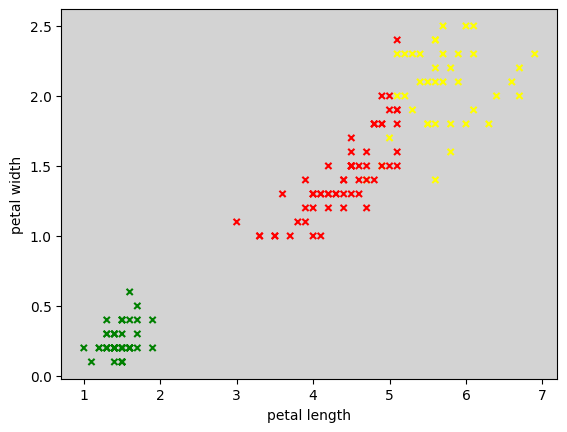

In [103]:
colors = [get_color(kmeans.labels_[j]) for j in range(len(data))]
p = data_in_frame.plot.scatter('petal length', 'petal width',
                                      c = colors, marker='x')
p.set_facecolor('lightgrey')

(b) Tanulmányozza az alábbi kódot és próbálja ki a hierarchikus klaszterező előadáson tanult változatait (single link, complete link, average link)!

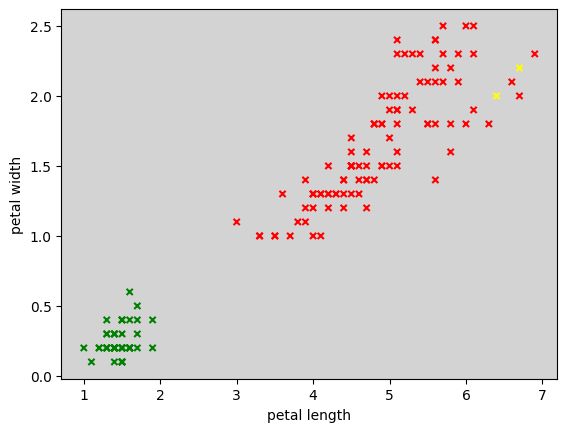

In [104]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=3, linkage='single')
model = model.fit(data)

colors = [get_color(model.labels_[j]) for j in range(len(data))]
p = data_in_frame.plot.scatter('petal length', 'petal width',
                                      c = colors, marker='x')
p.set_facecolor('lightgrey')

A klaszterezés eredményét ún. dendogramon is ábrázolhatjuk.

Lásd még: https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html

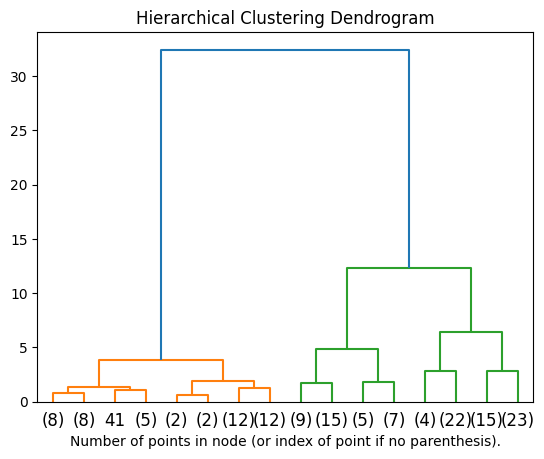

In [105]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(data)

plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()